In [1]:
import pandas as pd
import numpy as np
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('BA5.csv')
data.head()

,DateTime,Hole Depth,Bit Depth,True Vertical Depth,MudWatcher Temperature (Degrees F),MudAid Temperature (Degrees F),ES Meter Temperature (Degrees F),Mud Density,Mud Watcher Density (lb/gal),MudWatcher Viscosity,...,Hook Load,Standpipe Pressure,Rate Of Penetration,Rotary RPM,Rotary Torque,Azimuth,Inclination,In Slip,Differential Pressure,Rate Of Penetration.1
0,11/20/2020 0:51:10,106.0,8.9,-999.25,0.0,134.6,138.5,8.7,5.17,0.0,...,57.0,146.25,0.0,0.0,0.226,16.51,1.0,0,42.89,0.0
1,11/20/2020 0:51:20,106.0,100.0,-999.25,0.0,134.6,138.5,8.7,5.17,0.0,...,57.0,147.50,0.0,0.0,0.226,16.51,1.0,0,48.28,0.0
2,11/20/2020 0:51:30,106.0,100.0,-999.25,0.0,134.6,138.5,8.7,5.17,0.0,...,57.1,152.50,0.0,0.0,0.226,16.51,1.0,0,59.68,0.0
3,11/20/2020 0:51:40,106.0,100.0,-999.25,0.0,134.6,138.5,8.7,5.17,0.0,...,57.0,170.00,0.0,0.0,0.226,16.51,1.0,0,69.43,0.0
4,11/20/2020 0:51:50,106.0,100.0,-999.25,0.0,134.6,138.5,8.7,5.17,0.0,...,57.1,168.75,0.0,0.0,0.226,16.51,1.0,0,74.93,0.0


# Predicting mud properties from system parameters

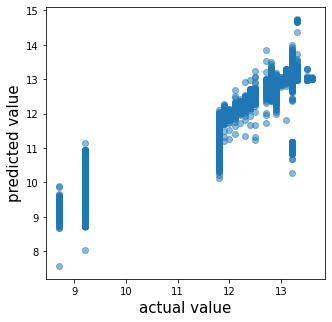

In [8]:
# linear regression doesnt seem to be a good model for this data
# magnitudes are not shown in this study

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = data.drop(['DateTime','True Vertical Depth','MudWatcher Temperature (Degrees F)', 
               'MudAid Temperature (Degrees F)',
       'ES Meter Temperature (Degrees F)', 'Mud Density',
       'Mud Watcher Density (lb/gal)', 'MudWatcher Viscosity',
       'ES Meter Voltage', 'MudAid Viscosity @ 600RPM (D.R.)',
       'MudAid Viscosity @ 300RPM (D.R.)', 'MudAid Viscosity @ 200RPM (D.R.)',
       'MudAid Viscosity @ 100RPM (D.R.)', 'MudAid Viscosity @ 6RPM (D.R.)',
       'MudAid Viscosity @ 3RPM (D.R.)', 'PV (API)', 'MudAid PV Value',
       'YP (API)', 'MudAid YP Value (100lb/ft2)', 'LSYP (API)',
       'MudAid LSYP (100lb/ft2)',], axis = 1)

Y = data[['Mud Density']]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

plt.figure(figsize=(5,5))
plt.plot(y_test, y_pred,'o', alpha = 0.5)
# plt.ylim(-10,150)
# plt.xlim(-10,150)
# plt.title('Mud Density', fontsize = 15)
plt.xlabel('actual value', fontsize = 15)
plt.ylabel('predicted value', fontsize = 15)
plt.show()

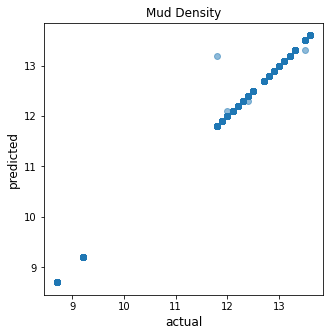

In [9]:
from sklearn.tree import DecisionTreeRegressor


X = data.drop(['DateTime','True Vertical Depth','MudWatcher Temperature (Degrees F)', 
               'MudAid Temperature (Degrees F)',
       'ES Meter Temperature (Degrees F)', 'Mud Density',
       'Mud Watcher Density (lb/gal)', 'MudWatcher Viscosity',
       'ES Meter Voltage', 'MudAid Viscosity @ 600RPM (D.R.)',
       'MudAid Viscosity @ 300RPM (D.R.)', 'MudAid Viscosity @ 200RPM (D.R.)',
       'MudAid Viscosity @ 100RPM (D.R.)', 'MudAid Viscosity @ 6RPM (D.R.)',
       'MudAid Viscosity @ 3RPM (D.R.)', 'PV (API)', 'MudAid PV Value',
       'YP (API)', 'MudAid YP Value (100lb/ft2)', 'LSYP (API)',
       'MudAid LSYP (100lb/ft2)',], axis = 1)

Y = data[['Mud Density']]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

model = DecisionTreeRegressor(max_depth=35)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

plt.figure(figsize=(5,5))
plt.plot(y_test, y_pred,'o', alpha = 0.5)
# plt.ylim(-10,150)
# plt.xlim(-10,150)
plt.title('Mud Density', fontsize = 12)
plt.xlabel('actual', fontsize = 12)
plt.ylabel('predicted', fontsize = 12)
plt.savefig('example_ Mud Density all magnitudes.png', dpi = 500)
plt.show()

# Predicting MudWatcher Temperature (Degrees F)


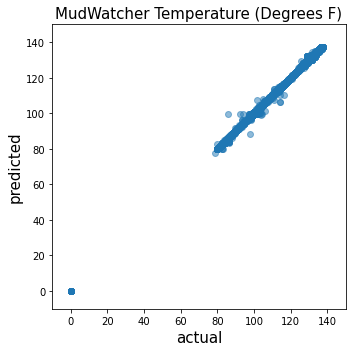

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

X = data.drop(['DateTime','True Vertical Depth', 'MudWatcher Temperature (Degrees F)', 
               'MudAid Temperature (Degrees F)', 'ES Meter Temperature (Degrees F)'], axis = 1)

Y = data[['MudWatcher Temperature (Degrees F)']]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

model = DecisionTreeRegressor(max_depth=15)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

plt.figure(figsize=(5,5))
plt.plot(y_test, y_pred,'o', alpha = 0.5)
plt.ylim(-10,150)
plt.xlim(-10,150)
plt.title('MudWatcher Temperature (Degrees F)', fontsize = 15)
plt.xlabel('actual', fontsize = 15)
plt.ylabel('predicted', fontsize = 15)
plt.tight_layout()
plt.savefig('example_ MudWatcher Temperature all magnitudes.png', dpi = 500)
plt.show()

In [12]:
table = pd.DataFrame()
table['parameter'] = X.columns
table['relevance'] = model.feature_importances_
t1 = table.sort_values(by = 'relevance', ascending = False).parameter[:10]
list(np.array(t1))

['MudWatcher Viscosity',
 'MudAid Viscosity @ 100RPM (D.R.)',
 'Hole Depth',
 'Bit Depth',
 'Mud Density',
 'MudAid Viscosity @ 200RPM (D.R.)',
 'MudAid Viscosity @ 6RPM (D.R.)',
 'ES Meter Voltage',
 'MudAid LSYP (100lb/ft2)',
 'MudAid PV Value']

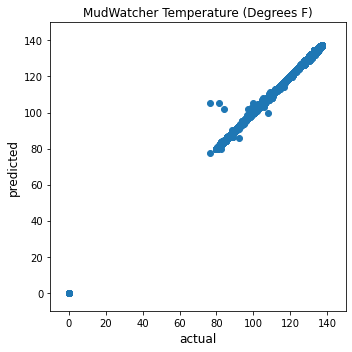

In [60]:
X = data[np.array(t1)]

Y = data[['MudWatcher Temperature (Degrees F)']]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

model = DecisionTreeRegressor(max_depth=15)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

plt.figure(figsize=(5,5))
plt.plot(y_test, y_pred,'o')
plt.ylim(-10,150)
plt.xlim(-10,150)
plt.title('MudWatcher Temperature (Degrees F)', fontsize = 12)
plt.xlabel('actual', fontsize = 12)
plt.ylabel('predicted', fontsize = 12)
plt.tight_layout()
plt.savefig('example_ MudWatcher Temperature.png', dpi = 500)
plt.show()

# predicting Standpipe Pressure

In [61]:
data.columns

Index(['DateTime', 'Hole Depth', 'Bit Depth', 'True Vertical Depth',
       'MudWatcher Temperature (Degrees F)', 'MudAid Temperature (Degrees F)',
       'ES Meter Temperature (Degrees F)', 'Mud Density',
       'Mud Watcher Density (lb/gal)', 'MudWatcher Viscosity',
       'ES Meter Voltage', 'MudAid Viscosity @ 600RPM (D.R.)',
       'MudAid Viscosity @ 300RPM (D.R.)', 'MudAid Viscosity @ 200RPM (D.R.)',
       'MudAid Viscosity @ 100RPM (D.R.)', 'MudAid Viscosity @ 6RPM (D.R.)',
       'MudAid Viscosity @ 3RPM (D.R.)', 'PV (API)', 'MudAid PV Value',
       'YP (API)', 'MudAid YP Value (100lb/ft2)', 'LSYP (API)',
       'MudAid LSYP (100lb/ft2)', 'Weight on Bit', 'Block Height',
       'Trip Speed', 'Total Pump Output', 'Hook Load', 'Standpipe Pressure',
       'Rate Of Penetration', 'Rotary RPM', 'Rotary Torque', 'Azimuth',
       'Inclination', 'In Slip', 'Differential Pressure',
       'Rate Of Penetration.1'],
      dtype='object')

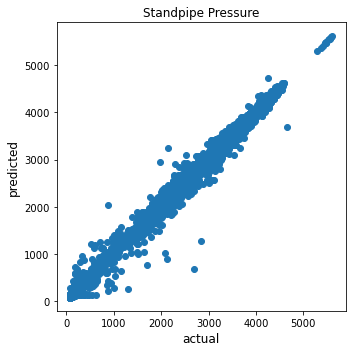

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

X = data.drop(['DateTime','True Vertical Depth','Standpipe Pressure'], axis = 1)

Y = data[['Standpipe Pressure']]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

model = DecisionTreeRegressor(max_depth=15)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

plt.figure(figsize=(5,5))
plt.plot(y_test, y_pred,'o')
# plt.ylim(-10,150)
# plt.xlim(-10,150)
plt.title('Standpipe Pressure', fontsize = 12)
plt.xlabel('actual', fontsize = 12)
plt.ylabel('predicted', fontsize = 12)
plt.tight_layout()
plt.savefig('example_ Standpipe Pressure all magnitudes.png', dpi = 500)
plt.show()

In [68]:
table = pd.DataFrame()
table['parameter'] = X.columns
table['relevance'] = model.feature_importances_
t1 = table.sort_values(by = 'relevance', ascending = False).parameter[:10]
list(np.array(t1))

['Total Pump Output',
 'Differential Pressure',
 'Bit Depth',
 'Hole Depth',
 'PV (API)',
 'MudAid LSYP (100lb/ft2)',
 'Rate Of Penetration',
 'MudWatcher Temperature (Degrees F)',
 'Hook Load',
 'Inclination']

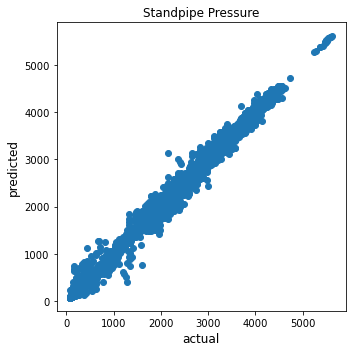

In [72]:
X = data[np.array(t1)]

Y = data[['Standpipe Pressure']]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

model = DecisionTreeRegressor(max_depth=25)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

plt.figure(figsize=(5,5))
plt.plot(y_test, y_pred,'o')
# plt.ylim(-10,150)
# plt.xlim(-10,150)
plt.title('Standpipe Pressure', fontsize = 12)
plt.xlabel('actual', fontsize = 12)
plt.ylabel('predicted', fontsize = 12)
plt.tight_layout()
plt.savefig('example_ Standpipe Pressure.png', dpi = 500)
plt.show()

# predicting Rotary Torque

In [96]:
data.columns

Index(['DateTime', 'Hole Depth', 'Bit Depth', 'True Vertical Depth',
       'MudWatcher Temperature (Degrees F)', 'MudAid Temperature (Degrees F)',
       'ES Meter Temperature (Degrees F)', 'Mud Density',
       'Mud Watcher Density (lb/gal)', 'MudWatcher Viscosity',
       'ES Meter Voltage', 'MudAid Viscosity @ 600RPM (D.R.)',
       'MudAid Viscosity @ 300RPM (D.R.)', 'MudAid Viscosity @ 200RPM (D.R.)',
       'MudAid Viscosity @ 100RPM (D.R.)', 'MudAid Viscosity @ 6RPM (D.R.)',
       'MudAid Viscosity @ 3RPM (D.R.)', 'PV (API)', 'MudAid PV Value',
       'YP (API)', 'MudAid YP Value (100lb/ft2)', 'LSYP (API)',
       'MudAid LSYP (100lb/ft2)', 'Weight on Bit', 'Block Height',
       'Trip Speed', 'Total Pump Output', 'Hook Load', 'Standpipe Pressure',
       'Rate Of Penetration', 'Rotary RPM', 'Rotary Torque', 'Azimuth',
       'Inclination', 'In Slip', 'Differential Pressure',
       'Rate Of Penetration.1'],
      dtype='object')

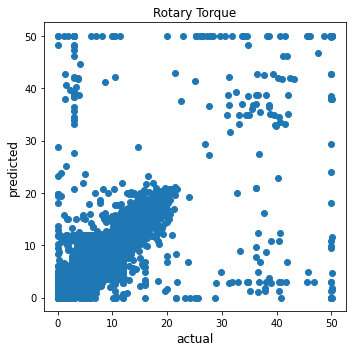

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

X = data.drop(['DateTime','True Vertical Depth','Rotary Torque'], axis = 1)

Y = data[['Rotary Torque']]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

model = DecisionTreeRegressor(max_depth=50)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

plt.figure(figsize=(5,5))
plt.plot(y_test, y_pred,'o')
# plt.ylim(-10,150)
# plt.xlim(-10,150)
plt.title('Rotary Torque', fontsize = 12)
plt.xlabel('actual', fontsize = 12)
plt.ylabel('predicted', fontsize = 12)
plt.tight_layout()
plt.savefig('example_ Rotary Torque all magnitudes.png', dpi = 500)
plt.show()

# predicting Total Pump Output

In [107]:
data.columns

Index(['DateTime', 'Hole Depth', 'Bit Depth', 'True Vertical Depth',
       'MudWatcher Temperature (Degrees F)', 'MudAid Temperature (Degrees F)',
       'ES Meter Temperature (Degrees F)', 'Mud Density',
       'Mud Watcher Density (lb/gal)', 'MudWatcher Viscosity',
       'ES Meter Voltage', 'MudAid Viscosity @ 600RPM (D.R.)',
       'MudAid Viscosity @ 300RPM (D.R.)', 'MudAid Viscosity @ 200RPM (D.R.)',
       'MudAid Viscosity @ 100RPM (D.R.)', 'MudAid Viscosity @ 6RPM (D.R.)',
       'MudAid Viscosity @ 3RPM (D.R.)', 'PV (API)', 'MudAid PV Value',
       'YP (API)', 'MudAid YP Value (100lb/ft2)', 'LSYP (API)',
       'MudAid LSYP (100lb/ft2)', 'Weight on Bit', 'Block Height',
       'Trip Speed', 'Total Pump Output', 'Hook Load', 'Standpipe Pressure',
       'Rate Of Penetration', 'Rotary RPM', 'Rotary Torque', 'Azimuth',
       'Inclination', 'In Slip', 'Differential Pressure',
       'Rate Of Penetration.1'],
      dtype='object')

/tmp/ipykernel_215870/333167242.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


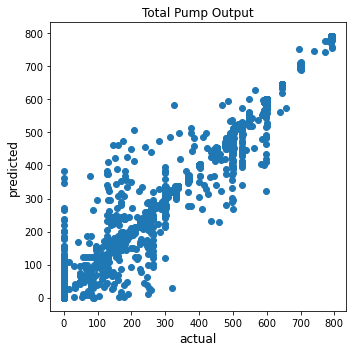

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor

X = data.drop(['DateTime','True Vertical Depth','Total Pump Output'], axis = 1)

Y = data[['Total Pump Output']]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

model = ExtraTreesRegressor(max_depth=50, n_estimators = 150)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

plt.figure(figsize=(5,5))
plt.plot(y_test, y_pred,'o')
# plt.ylim(-10,150)
# plt.xlim(-10,150)
plt.title('Total Pump Output', fontsize = 12)
plt.xlabel('actual', fontsize = 12)
plt.ylabel('predicted', fontsize = 12)
plt.tight_layout()
plt.savefig('example_ Total Pump Output all magnitudes.png', dpi = 500)
plt.show()

In [124]:
table = pd.DataFrame()
table['parameter'] = X.columns
table['relevance'] = model.feature_importances_
t1 = table.sort_values(by = 'relevance', ascending = False).parameter[:10]
list(np.array(t1))

['Standpipe Pressure',
 'In Slip',
 'Differential Pressure',
 'Weight on Bit',
 'Rotary Torque',
 'MudAid Viscosity @ 6RPM (D.R.)',
 'Mud Density',
 'Inclination',
 'MudAid LSYP (100lb/ft2)',
 'MudAid Viscosity @ 300RPM (D.R.)']

/tmp/ipykernel_215870/3946668366.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


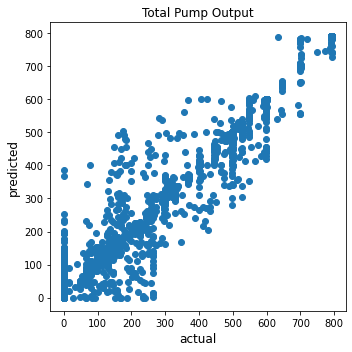

In [125]:
X = data[np.array(t1)]

Y = data[['Total Pump Output']]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

model = RandomForestRegressor(max_depth=25)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

plt.figure(figsize=(5,5))
plt.plot(y_test, y_pred,'o')
# plt.ylim(-10,825)
# plt.xlim(-10,825)
plt.title('Total Pump Output', fontsize = 12)
plt.xlabel('actual', fontsize = 12)
plt.ylabel('predicted', fontsize = 12)
plt.tight_layout()
plt.savefig('example_ Total Pump Output.png', dpi = 500)
plt.show()

# predicting Rate Of Penetration

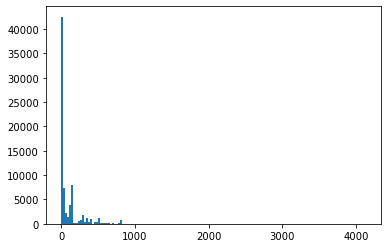

In [77]:
plt.hist(data['Rate Of Penetration'], bins = 150)
plt.show()

In [78]:
data.columns

Index(['DateTime', 'Hole Depth', 'Bit Depth', 'True Vertical Depth',
       'MudWatcher Temperature (Degrees F)', 'MudAid Temperature (Degrees F)',
       'ES Meter Temperature (Degrees F)', 'Mud Density',
       'Mud Watcher Density (lb/gal)', 'MudWatcher Viscosity',
       'ES Meter Voltage', 'MudAid Viscosity @ 600RPM (D.R.)',
       'MudAid Viscosity @ 300RPM (D.R.)', 'MudAid Viscosity @ 200RPM (D.R.)',
       'MudAid Viscosity @ 100RPM (D.R.)', 'MudAid Viscosity @ 6RPM (D.R.)',
       'MudAid Viscosity @ 3RPM (D.R.)', 'PV (API)', 'MudAid PV Value',
       'YP (API)', 'MudAid YP Value (100lb/ft2)', 'LSYP (API)',
       'MudAid LSYP (100lb/ft2)', 'Weight on Bit', 'Block Height',
       'Trip Speed', 'Total Pump Output', 'Hook Load', 'Standpipe Pressure',
       'Rate Of Penetration', 'Rotary RPM', 'Rotary Torque', 'Azimuth',
       'Inclination', 'In Slip', 'Differential Pressure',
       'Rate Of Penetration.1'],
      dtype='object')

/tmp/ipykernel_215870/3888290916.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


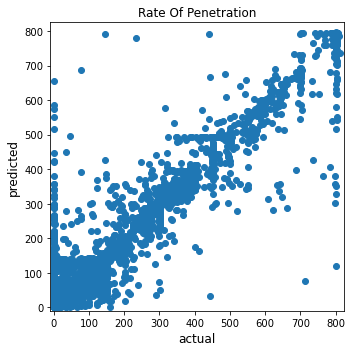

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X = data.drop(['DateTime','True Vertical Depth','Rate Of Penetration','Rate Of Penetration.1'], axis = 1)

Y = data[['Rate Of Penetration']]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

model = RandomForestRegressor(max_depth=10)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

plt.figure(figsize=(5,5))
plt.plot(y_test, y_pred,'o')
plt.ylim(-10,825)
plt.xlim(-10,825)
plt.title('Rate Of Penetration', fontsize = 12)
plt.xlabel('actual', fontsize = 12)
plt.ylabel('predicted', fontsize = 12)
plt.tight_layout()
plt.savefig('example_ Rate Of Penetration all magnitudes.png', dpi = 500)
plt.show()

In [92]:
table = pd.DataFrame()
table['parameter'] = X.columns
table['relevance'] = model.feature_importances_
t1 = table.sort_values(by = 'relevance', ascending = False).parameter[:10]
list(np.array(t1))

['Rotary RPM',
 'Differential Pressure',
 'Hook Load',
 'Total Pump Output',
 'Trip Speed',
 'Hole Depth',
 'Bit Depth',
 'Block Height',
 'Standpipe Pressure',
 'MudAid Viscosity @ 6RPM (D.R.)']

/tmp/ipykernel_215870/3930216595.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


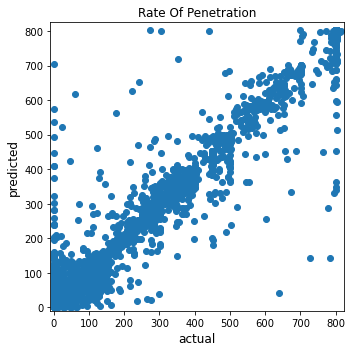

In [95]:
X = data[np.array(t1)]

Y = data[['Rate Of Penetration']]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

model = RandomForestRegressor(max_depth=25)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

plt.figure(figsize=(5,5))
plt.plot(y_test, y_pred,'o')
plt.ylim(-10,825)
plt.xlim(-10,825)
plt.title('Rate Of Penetration', fontsize = 12)
plt.xlabel('actual', fontsize = 12)
plt.ylabel('predicted', fontsize = 12)
plt.tight_layout()
plt.savefig('example_ Rate Of Penetration.png', dpi = 500)
plt.show()

In [ ]:
# evaluate multioutput regression model with k-fold cross-validation
from numpy import absolute
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
# create datasets
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, n_targets=2, random_state=1, noise=0.5)
# define model
model = DecisionTreeRegressor()
# define the evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

# multitarget regression

In [176]:
# evaluate multioutput regression model with k-fold cross-validation
from numpy import absolute
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
# create datasets
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, n_targets=2, random_state=1, noise=0.5)
# define model
model = DecisionTreeRegressor()
# define the evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: 51.793 (3.136)


In [177]:
from sklearn.metrics import mean_squared_error

def get_mse(y_test, y_pred):
    me = []
    for i in range(len(y_test.columns)):
        mse1 = mean_squared_error(y_pred.T[i], y_test[y_test.columns[i]])
        # print(mse1)
        me.append(mse1)
    return min(me), max(me), np.mean(me), me

391.76808007417634
0.0016659352299815244


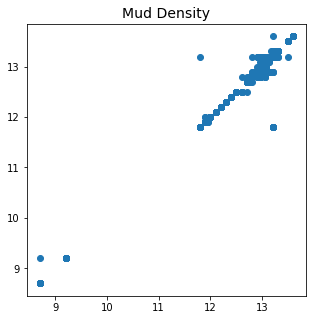

39.65082600804496


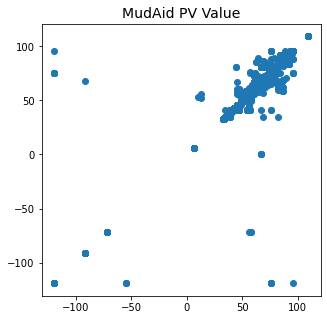

10.214482691593261


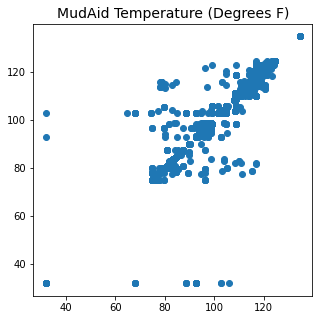

0.12755075068851485


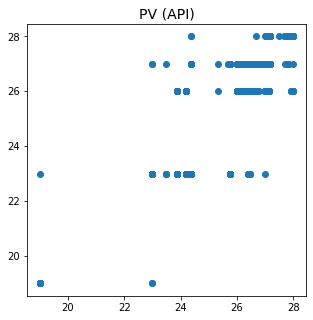

0.12744835945831848


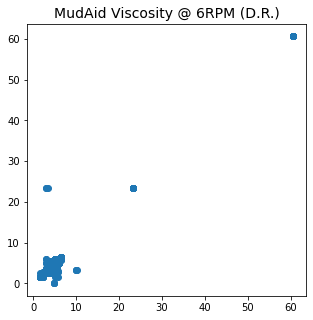

3406.0852776837855


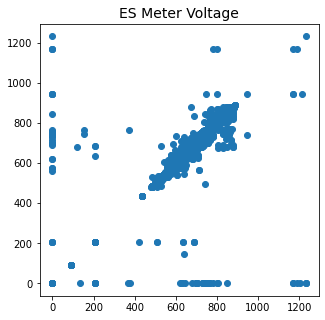

8.43071451456911


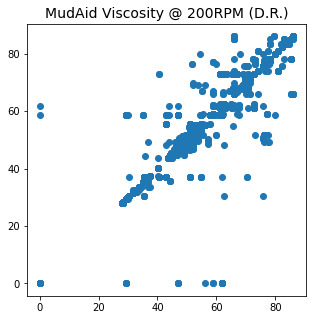

8.33013346761173


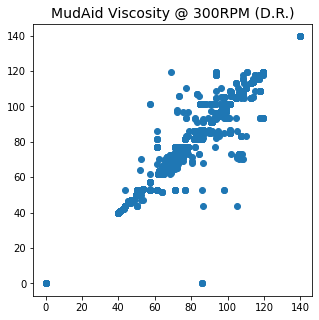

52.94462125660584


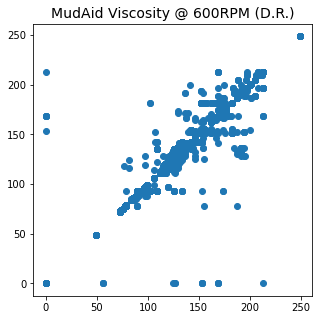

In [208]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


X = data.drop(['DateTime','True Vertical Depth','MudWatcher Temperature (Degrees F)', 
               'MudAid Temperature (Degrees F)',
       'ES Meter Temperature (Degrees F)', 'Mud Density',
       'Mud Watcher Density (lb/gal)', 'MudWatcher Viscosity',
       'ES Meter Voltage', 'MudAid Viscosity @ 600RPM (D.R.)',
       'MudAid Viscosity @ 300RPM (D.R.)', 'MudAid Viscosity @ 200RPM (D.R.)',
       'MudAid Viscosity @ 100RPM (D.R.)', 'MudAid Viscosity @ 6RPM (D.R.)',
       'MudAid Viscosity @ 3RPM (D.R.)', 'PV (API)', 'MudAid PV Value',
       'YP (API)', 'MudAid YP Value (100lb/ft2)', 'LSYP (API)',
       'MudAid LSYP (100lb/ft2)',
       'Rate Of Penetration.1',], axis = 1)

for i in range(len(X.columns)):
    for j in range(i):
        X[X.columns[i] + ' x ' + X.columns[j]] = X[X.columns[i]] * X[X.columns[j]]

Y = data[['Mud Density', 'MudAid PV Value', 'MudAid Temperature (Degrees F)','PV (API)', 
          'MudAid Viscosity @ 6RPM (D.R.)','ES Meter Voltage',
          'MudAid Viscosity @ 200RPM (D.R.)',
          'MudAid Viscosity @ 300RPM (D.R.)', 'MudAid Viscosity @ 600RPM (D.R.)',
          
          ]]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

model = DecisionTreeRegressor(max_depth=20, min_samples_split=4)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

_, _, mse_ave, mse = get_mse(y_test, y_pred)
print(mse_ave)


for i in range(len(Y.columns)):
    print(mse[i])
    plt.figure(figsize=(5,5))
    plt.plot(y_pred.T[i], y_test[y_test.columns[i]], 'o')
    plt.title(y_test.columns[i], fontsize = 14)
    plt.show()

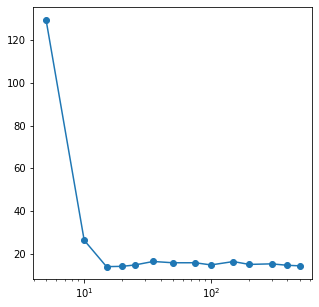

In [193]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


X = data.drop(['DateTime','True Vertical Depth','MudWatcher Temperature (Degrees F)', 
               'MudAid Temperature (Degrees F)',
       'ES Meter Temperature (Degrees F)', 'Mud Density',
       'Mud Watcher Density (lb/gal)', 'MudWatcher Viscosity',
       'ES Meter Voltage', 'MudAid Viscosity @ 600RPM (D.R.)',
       'MudAid Viscosity @ 300RPM (D.R.)', 'MudAid Viscosity @ 200RPM (D.R.)',
       'MudAid Viscosity @ 100RPM (D.R.)', 'MudAid Viscosity @ 6RPM (D.R.)',
       'MudAid Viscosity @ 3RPM (D.R.)', 'PV (API)', 'MudAid PV Value',
       'YP (API)', 'MudAid YP Value (100lb/ft2)', 'LSYP (API)',
       'MudAid LSYP (100lb/ft2)',
       'Rate Of Penetration.1',], axis = 1)

for i in range(len(X.columns)):
    for j in range(i):
        X[X.columns[i] + ' x ' + X.columns[j]] = X[X.columns[i]] * X[X.columns[j]]

Y = data[['Mud Density', 'MudAid PV Value', 'MudAid Temperature (Degrees F)','PV (API)', 
          'MudAid Viscosity @ 6RPM (D.R.)',
          'MudAid Viscosity @ 200RPM (D.R.)',
          'MudAid Viscosity @ 300RPM (D.R.)', 'MudAid Viscosity @ 600RPM (D.R.)',
          
          ]]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 1)

md = [5, 10, 15, 20, 25, 35, 50, 75, 100, 150, 200, 300, 400, 500]
mse_values = []
for i in md:
    model = DecisionTreeRegressor(max_depth=i, min_samples_split=4)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    _, _, mse_ave, mse = get_mse(y_test, y_pred)
    mse_values.append(mse_ave)

plt.figure(figsize=(5,5))
plt.plot(md, mse_values, '-o')
plt.xscale('log')
plt.show()

In [196]:
min(mse_values)

13.856953028450231

In [195]:
md[argmin(mse_values)]

15

8.026075849789974


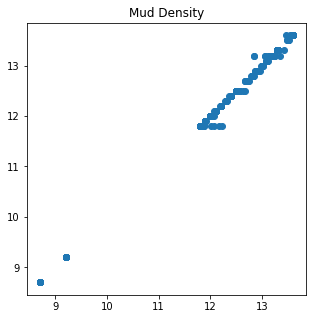

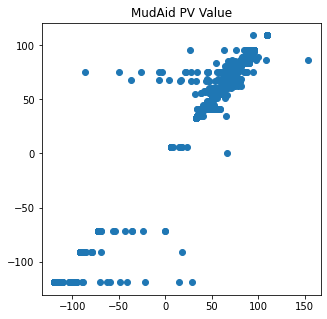

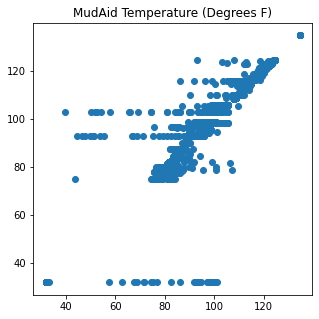

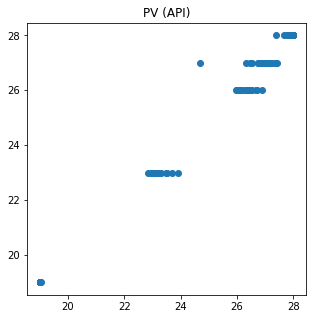

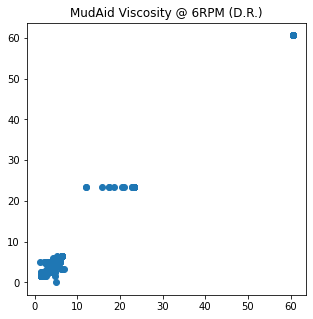

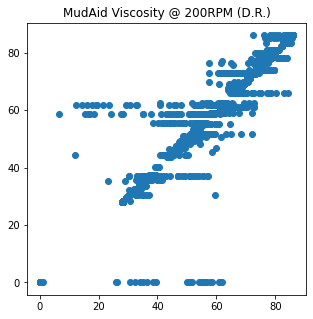

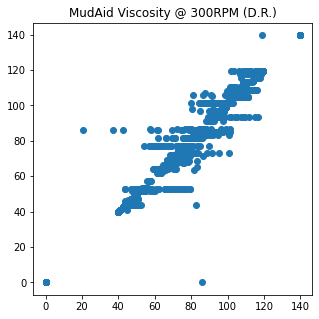

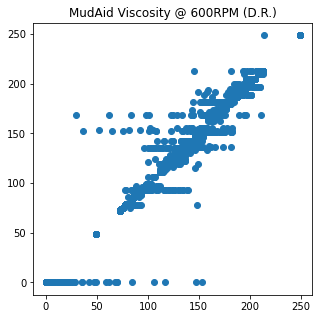

In [183]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


X = data.drop(['DateTime','True Vertical Depth','MudWatcher Temperature (Degrees F)', 
               'MudAid Temperature (Degrees F)',
       'ES Meter Temperature (Degrees F)', 'Mud Density',
       'Mud Watcher Density (lb/gal)', 'MudWatcher Viscosity',
       'ES Meter Voltage', 'MudAid Viscosity @ 600RPM (D.R.)',
       'MudAid Viscosity @ 300RPM (D.R.)', 'MudAid Viscosity @ 200RPM (D.R.)',
       'MudAid Viscosity @ 100RPM (D.R.)', 'MudAid Viscosity @ 6RPM (D.R.)',
       'MudAid Viscosity @ 3RPM (D.R.)', 'PV (API)', 'MudAid PV Value',
       'YP (API)', 'MudAid YP Value (100lb/ft2)', 'LSYP (API)',
       'MudAid LSYP (100lb/ft2)',], axis = 1)

Y = data[['Mud Density', 'MudAid PV Value', 'MudAid Temperature (Degrees F)','PV (API)', 
          'MudAid Viscosity @ 6RPM (D.R.)',
          'MudAid Viscosity @ 200RPM (D.R.)',
          'MudAid Viscosity @ 300RPM (D.R.)', 'MudAid Viscosity @ 600RPM (D.R.)',
          
          ]]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 1)

model = RandomForestRegressor(max_depth=50, n_estimators = 100)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

_, _, mse_ave, mse = get_mse(y_test, y_pred)
print(mse_ave)

for i in range(len(Y.columns)):
    plt.figure(figsize=(5,5))
    plt.plot(y_pred.T[i], y_test[y_test.columns[i]], 'o')
    plt.title(y_test.columns[i], )
    plt.show()

9.34759964637696


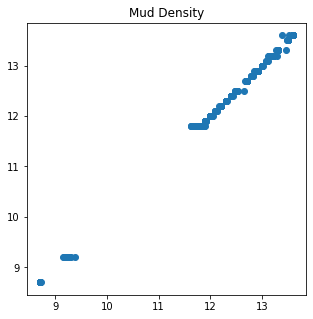

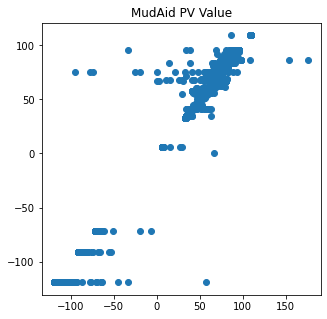

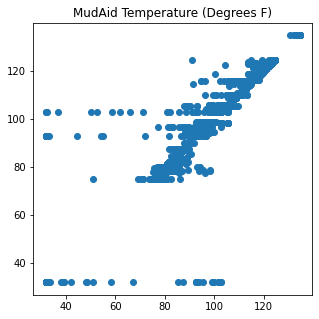

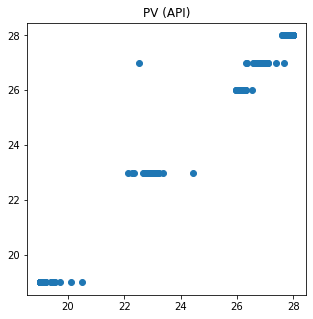

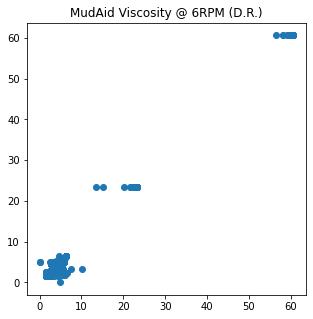

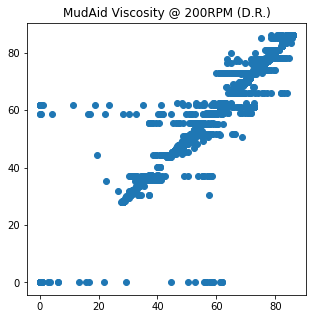

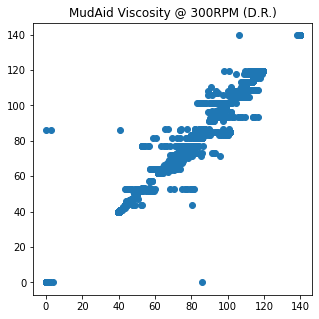

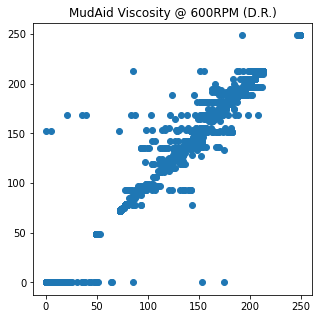

In [185]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor


X = data.drop(['DateTime','True Vertical Depth','MudWatcher Temperature (Degrees F)', 
               'MudAid Temperature (Degrees F)',
       'ES Meter Temperature (Degrees F)', 'Mud Density',
       'Mud Watcher Density (lb/gal)', 'MudWatcher Viscosity',
       'ES Meter Voltage', 'MudAid Viscosity @ 600RPM (D.R.)',
       'MudAid Viscosity @ 300RPM (D.R.)', 'MudAid Viscosity @ 200RPM (D.R.)',
       'MudAid Viscosity @ 100RPM (D.R.)', 'MudAid Viscosity @ 6RPM (D.R.)',
       'MudAid Viscosity @ 3RPM (D.R.)', 'PV (API)', 'MudAid PV Value',
       'YP (API)', 'MudAid YP Value (100lb/ft2)', 'LSYP (API)',
       'MudAid LSYP (100lb/ft2)',], axis = 1)

Y = data[['Mud Density', 'MudAid PV Value', 'MudAid Temperature (Degrees F)','PV (API)', 
          'MudAid Viscosity @ 6RPM (D.R.)',
          'MudAid Viscosity @ 200RPM (D.R.)',
          'MudAid Viscosity @ 300RPM (D.R.)', 'MudAid Viscosity @ 600RPM (D.R.)',
          
          ]]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 1)

model = ExtraTreesRegressor(max_depth=50, n_estimators = 100)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

_, _, mse_ave, mse = get_mse(y_test, y_pred)
print(mse_ave)

for i in range(len(Y.columns)):
    plt.figure(figsize=(5,5))
    plt.plot(y_pred.T[i], y_test[y_test.columns[i]], 'o')
    plt.title(y_test.columns[i], )
    plt.show()

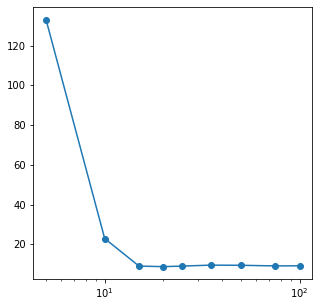

In [198]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


X = data.drop(['DateTime','True Vertical Depth','MudWatcher Temperature (Degrees F)', 
               'MudAid Temperature (Degrees F)',
       'ES Meter Temperature (Degrees F)', 'Mud Density',
       'Mud Watcher Density (lb/gal)', 'MudWatcher Viscosity',
       'ES Meter Voltage', 'MudAid Viscosity @ 600RPM (D.R.)',
       'MudAid Viscosity @ 300RPM (D.R.)', 'MudAid Viscosity @ 200RPM (D.R.)',
       'MudAid Viscosity @ 100RPM (D.R.)', 'MudAid Viscosity @ 6RPM (D.R.)',
       'MudAid Viscosity @ 3RPM (D.R.)', 'PV (API)', 'MudAid PV Value',
       'YP (API)', 'MudAid YP Value (100lb/ft2)', 'LSYP (API)',
       'MudAid LSYP (100lb/ft2)',
       'Rate Of Penetration.1',], axis = 1)

for i in range(len(X.columns)):
    for j in range(i):
        X[X.columns[i] + ' x ' + X.columns[j]] = X[X.columns[i]] * X[X.columns[j]]

Y = data[['Mud Density', 'MudAid PV Value', 'MudAid Temperature (Degrees F)','PV (API)', 
          'MudAid Viscosity @ 6RPM (D.R.)',
          'MudAid Viscosity @ 200RPM (D.R.)',
          'MudAid Viscosity @ 300RPM (D.R.)', 'MudAid Viscosity @ 600RPM (D.R.)',
          
          ]]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 1)

md = [5, 10, 15, 20, 25, 35, 50, 75, 100]
mse_values = []
for i in md:
    model = RandomForestRegressor(max_depth=i, n_estimators = 100 )
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    _, _, mse_ave, mse = get_mse(y_test, y_pred)
    mse_values.append(mse_ave)

plt.figure(figsize=(5,5))
plt.plot(md, mse_values, '-o')
plt.xscale('log')
plt.show()

In [199]:
md[argmin(mse_values)]

20

In [200]:
min(mse_values)

8.75601598535901

In [210]:
X = data.drop(['DateTime','True Vertical Depth','MudWatcher Temperature (Degrees F)', 
               'MudAid Temperature (Degrees F)',
       'ES Meter Temperature (Degrees F)', 'Mud Density',
       'Mud Watcher Density (lb/gal)', 'MudWatcher Viscosity',
       'ES Meter Voltage', 'MudAid Viscosity @ 600RPM (D.R.)',
       'MudAid Viscosity @ 300RPM (D.R.)', 'MudAid Viscosity @ 200RPM (D.R.)',
       'MudAid Viscosity @ 100RPM (D.R.)', 'MudAid Viscosity @ 6RPM (D.R.)',
       'MudAid Viscosity @ 3RPM (D.R.)', 'PV (API)', 'MudAid PV Value',
       'YP (API)', 'MudAid YP Value (100lb/ft2)', 'LSYP (API)',
       'MudAid LSYP (100lb/ft2)',
       'Rate Of Penetration.1',], axis = 1)

X.columns

Index(['Hole Depth', 'Bit Depth', 'Weight on Bit', 'Block Height',
       'Trip Speed', 'Total Pump Output', 'Hook Load', 'Standpipe Pressure',
       'Rate Of Penetration', 'Rotary RPM', 'Rotary Torque', 'Azimuth',
       'Inclination', 'In Slip', 'Differential Pressure'],
      dtype='object')

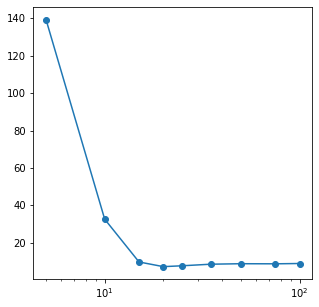

In [201]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor


X = data.drop(['DateTime','True Vertical Depth','MudWatcher Temperature (Degrees F)', 
               'MudAid Temperature (Degrees F)',
       'ES Meter Temperature (Degrees F)', 'Mud Density',
       'Mud Watcher Density (lb/gal)', 'MudWatcher Viscosity',
       'ES Meter Voltage', 'MudAid Viscosity @ 600RPM (D.R.)',
       'MudAid Viscosity @ 300RPM (D.R.)', 'MudAid Viscosity @ 200RPM (D.R.)',
       'MudAid Viscosity @ 100RPM (D.R.)', 'MudAid Viscosity @ 6RPM (D.R.)',
       'MudAid Viscosity @ 3RPM (D.R.)', 'PV (API)', 'MudAid PV Value',
       'YP (API)', 'MudAid YP Value (100lb/ft2)', 'LSYP (API)',
       'MudAid LSYP (100lb/ft2)',
       'Rate Of Penetration.1',], axis = 1)

for i in range(len(X.columns)):
    for j in range(i):
        X[X.columns[i] + ' x ' + X.columns[j]] = X[X.columns[i]] * X[X.columns[j]]

Y = data[['Mud Density', 'MudAid PV Value', 'MudAid Temperature (Degrees F)','PV (API)', 
          'MudAid Viscosity @ 6RPM (D.R.)',
          'MudAid Viscosity @ 200RPM (D.R.)',
          'MudAid Viscosity @ 300RPM (D.R.)', 'MudAid Viscosity @ 600RPM (D.R.)',
          
          ]]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 1)

md = [5, 10, 15, 20, 25, 35, 50, 75, 100]
mse_values = []
for i in md:
    model = ExtraTreesRegressor(max_depth=i, n_estimators = 100 )
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    _, _, mse_ave, mse = get_mse(y_test, y_pred)
    mse_values.append(mse_ave)

plt.figure(figsize=(5,5))
plt.plot(md, mse_values, '-o')
plt.xscale('log')
plt.show()

In [202]:
md[argmin(mse_values)]

20

In [203]:
min(mse_values)

7.266856801086387

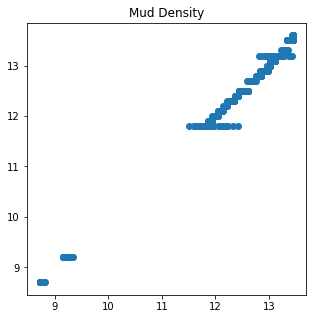

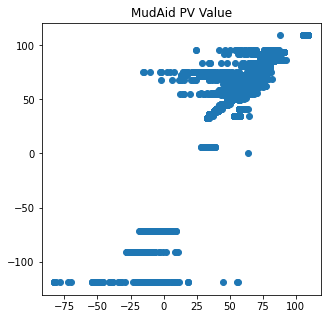

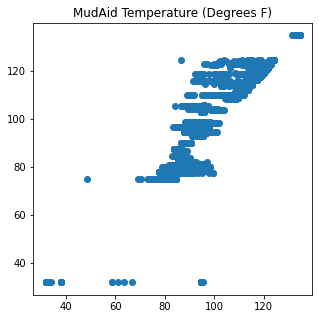

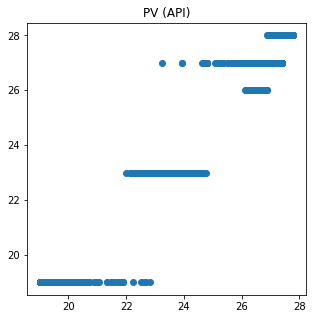

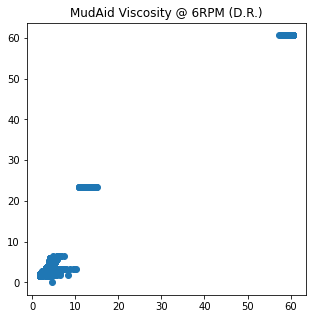

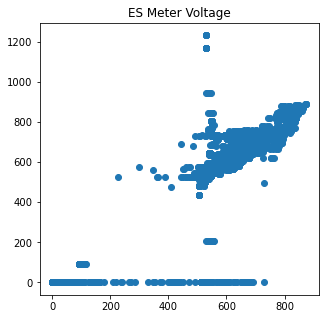

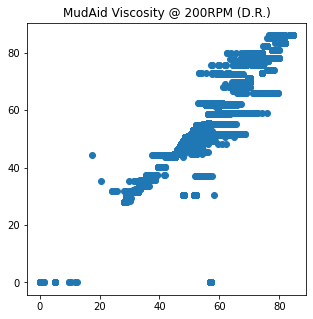

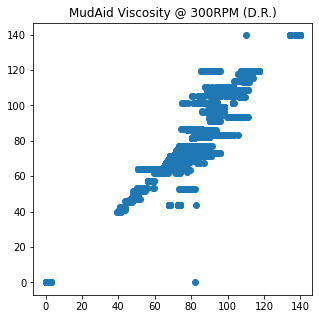

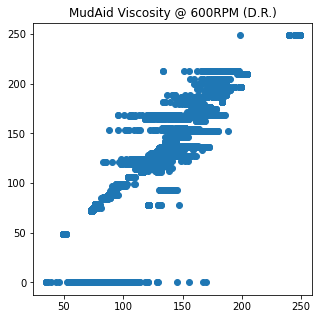

In [204]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor


X = data.drop(['DateTime','True Vertical Depth','MudWatcher Temperature (Degrees F)', 
               'MudAid Temperature (Degrees F)',
       'ES Meter Temperature (Degrees F)', 'Mud Density',
       'Mud Watcher Density (lb/gal)', 'MudWatcher Viscosity',
       'ES Meter Voltage', 'MudAid Viscosity @ 600RPM (D.R.)',
       'MudAid Viscosity @ 300RPM (D.R.)', 'MudAid Viscosity @ 200RPM (D.R.)',
       'MudAid Viscosity @ 100RPM (D.R.)', 'MudAid Viscosity @ 6RPM (D.R.)',
       'MudAid Viscosity @ 3RPM (D.R.)', 'PV (API)', 'MudAid PV Value',
       'YP (API)', 'MudAid YP Value (100lb/ft2)', 'LSYP (API)',
       'MudAid LSYP (100lb/ft2)','Rate Of Penetration.1'], axis = 1)

Y = data[['Mud Density', 'MudAid PV Value', 'MudAid Temperature (Degrees F)','PV (API)', 
          'MudAid Viscosity @ 6RPM (D.R.)','ES Meter Voltage',
          'MudAid Viscosity @ 200RPM (D.R.)',
          'MudAid Viscosity @ 300RPM (D.R.)', 'MudAid Viscosity @ 600RPM (D.R.)',
          
          ]]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 1)

model = ExtraTreesRegressor(max_depth=10, n_estimators = 100)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

for i in range(len(Y.columns)):
    plt.figure(figsize=(5,5))
    plt.plot(y_pred.T[i], y_test[y_test.columns[i]], 'o')
    plt.title(y_test.columns[i], )
    plt.show()

In [106]:
X.columns

Index(['Hole Depth', 'Bit Depth', 'Weight on Bit', 'Block Height',
       'Trip Speed', 'Total Pump Output', 'Hook Load', 'Standpipe Pressure',
       'Rate Of Penetration', 'Rotary RPM', 'Rotary Torque', 'Azimuth',
       'Inclination', 'In Slip', 'Differential Pressure',
       'Rate Of Penetration.1'],
      dtype='object')